<a href="https://colab.research.google.com/github/Cristian1308/Project-Machine-Learning/blob/main/Intervalos_en_la_Ratio_to_media_purchase_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intervalos en la Ratio to media purchase price

Se importan librerías para análisis de datos y visualización.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Se carga el dataset desde Google Drive.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Exploratorio/card_transdata.csv")

Se crean intervalos de la variable ratio_to_median_purchase_price y se asignan etiquetas para agrupar las transacciones por rangos de valores.

In [4]:
bins = [0, 1, 3, 10, float("inf")]
labels = ["[0-1]", "(1-3]", "(3-10]", ">10"]

df["ratio_interval"] = pd.cut(df["ratio_to_median_purchase_price"], bins=bins, labels=labels, include_lowest=True)

Se agrupan los datos por intervalo y se calcula:

In [8]:
summary = df.groupby("ratio_interval", observed=True).agg(
    total_transacciones=("fraud", "count"),
    total_fraudes=("fraud", "sum")
)
summary["porcentaje_fraude"] = (summary["total_fraudes"] / summary["total_transacciones"]) * 100

Se imprime el resumen estadístico de cada intervalo.

In [9]:
print(summary)

                total_transacciones  total_fraudes  porcentaje_fraude
ratio_interval                                                       
[0-1]                        500879        12567.0           2.508989
(1-3]                        340923         8451.0           2.478859
(3-10]                       140284        55024.0          39.223290
>10                           17914        11361.0          63.419672


Se crea un gráfico de barras con el porcentaje de fraude por intervalo.

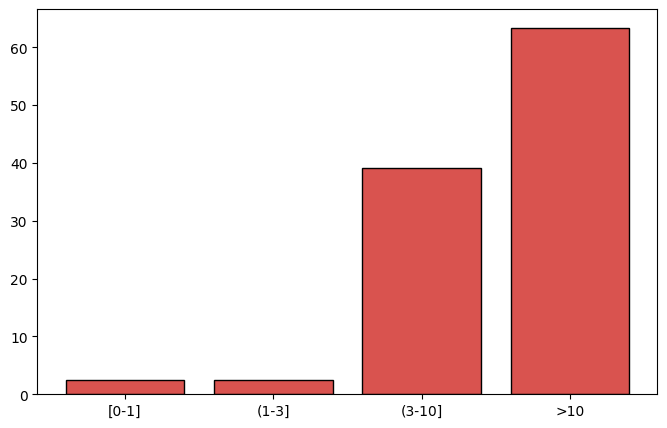

In [10]:
plt.figure(figsize=(8, 5))
bars = plt.bar(summary.index, summary["porcentaje_fraude"], color="#d9534f", edgecolor="black")